<a href="https://colab.research.google.com/github/bimarshak7/OpenCV-practice/blob/main/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Template Matching

In [2]:
!wget https://img.freepik.com/free-photo/pedigreed-puppy-collar-sitting-grass-park_651396-3781.jpg -q -O dog.jpg

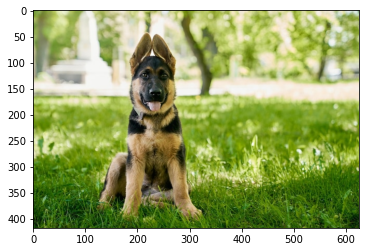

In [5]:
full = cv2.imread("dog.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

plt.imshow(full)

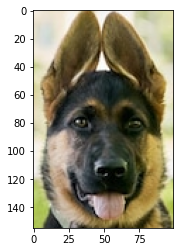

In [14]:
face = full[45:200,180:280,:]
plt.imshow(face)

In [15]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [23]:
height, width,channels = face.shape

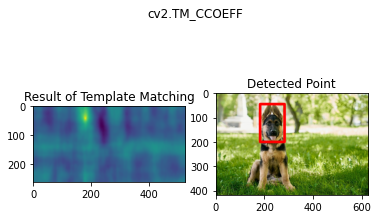

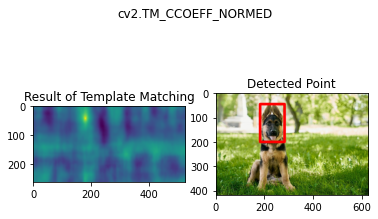

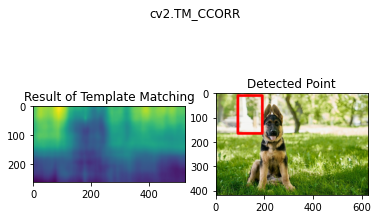

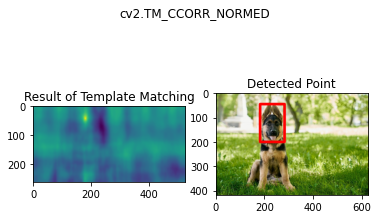

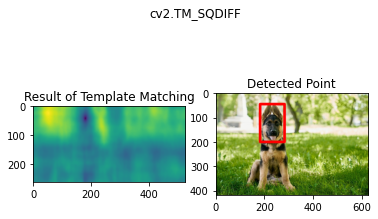

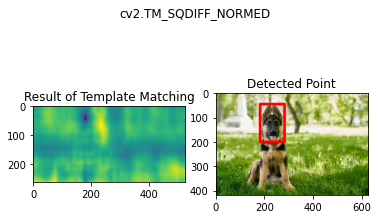

In [29]:
for m in methods:
  full_copy = full.copy()
  method = eval(m)

  res = cv2.matchTemplate(full_copy,face,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
  else:
        top_left = max_loc

  bottom_right = (top_left[0] + width, top_left[1] + height)
  cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

  # Plot the Images
  plt.subplot(121)
  plt.imshow(res)
  plt.title('Result of Template Matching')
    
  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title('Detected Point')
  plt.suptitle(m)
  plt.show()

## Corner Detection

In [90]:
!wget https://m.media-amazon.com/images/I/51X7NE45NzL._SY355_.jpg -q -O chess.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/c/c3/Chess_board_opening_staunton.jpg -q -O real_chess.jpg

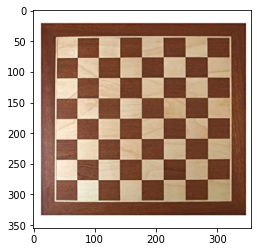

In [100]:
chess = cv2.imread("chess.jpg")
chess = cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)

plt.imshow(chess)

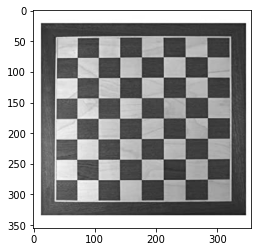

In [102]:
chess_gray = cv2.cvtColor(chess,cv2.COLOR_RGB2GRAY)
# chess_gray = np.power(chess_gray,1.9)
plt.imshow(chess_gray,cmap="gray")

**Harris Corner Detection**

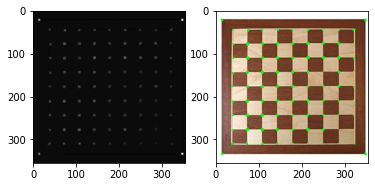

In [108]:
chess_gray = np.float32(chess_gray)

dst = cv2.cornerHarris(src=chess_gray,blockSize=4,ksize=3,k=0.02)
dst = cv2.dilate(dst,None)

chess[dst>0.1*dst.max()]=[0,255,0]

plt.subplot(121)
plt.imshow(dst,cmap="gray")
plt.subplot(122)
plt.imshow(chess)

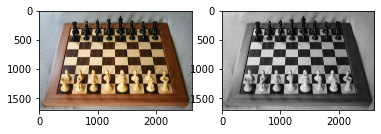

In [111]:
real_chess = cv2.imread('real_chess.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(real_chess)

plt.subplot(122)
plt.imshow(gray_real_chess,cmap='gray')


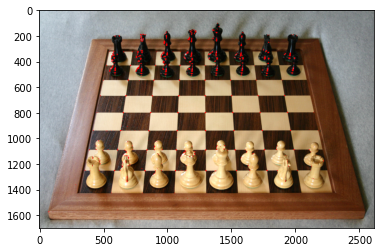

In [122]:
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=5,ksize=5,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess,cmap="gray")

**Shi-TOmasi Algo**

In [145]:
# reload all images
chess = cv2.imread('chess.jpg')
chess = cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)
gray_chess = cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)

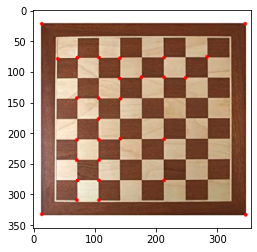

In [147]:
corners = cv2.goodFeaturesToTrack(gray_chess,150,0.5,10) #use 0 instead of 5 to detect all edges
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(chess,(x,y),3,255,-1)
plt.imshow(chess)

## Edge Detection

In [154]:
!wget https://www.loveyourdog.com/wp-content/uploads/2020/08/Beagle-Indoors.jpg -q -O dog_new.jpg

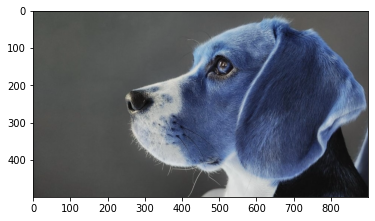

In [155]:
img = cv2.imread('dog_new.jpg')
plt.imshow(img)

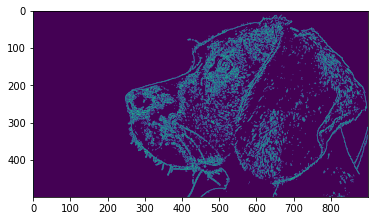

In [156]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edges)

general trend to chooose threshold  
https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

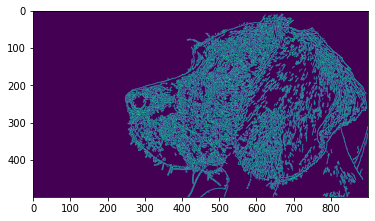

In [157]:
# Calculate the median pixel value
med_val = np.median(img)

# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))

# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

plt.imshow(edges)

Blurring can help to get rid of noise edges

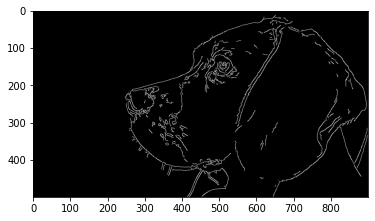

In [159]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges,cmap="gray")

## Grid Detection

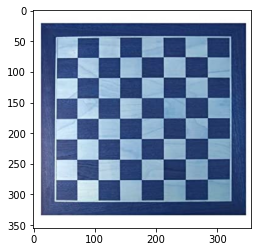

In [161]:
flat_chess = cv2.imread('chess.jpg')
plt.imshow(flat_chess,cmap='gray')

In [169]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


In [170]:
corners.shape

(49, 1, 2)

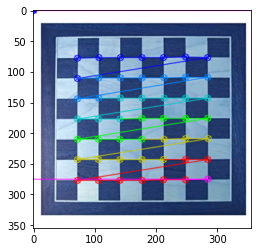

In [171]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (8, 8), corners, found)

plt.imshow(flat_chess_copy)

In [186]:
!wget https://365psd.com/images/previews/e52/dots-square-grid-03-pattern-clip-art-49843.jpg -q -O dot_grid.jpg

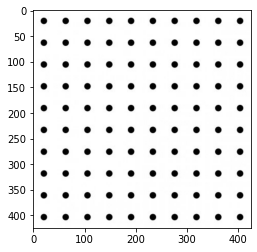

In [187]:
dot_grid = cv2.imread("dot_grid.jpg")
plt.imshow(dot_grid)

In [190]:
found, corners = cv2.findCirclesGrid(dot_grid, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
found

True

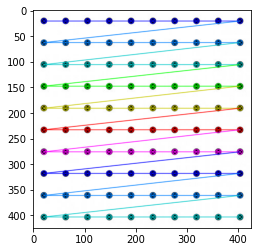

In [192]:
dot_circles = dot_grid.copy()
cv2.drawChessboardCorners(dot_circles, (10, 10), corners, found)

plt.imshow(dot_circles)

## Contour detection

In [195]:
!wget https://lh3.googleusercontent.com/yZklYlptGfutkfxX5JsHJeXvXK22yipPZbwKJwQJdo1Y8rXabkQ02X_4wk4_PMIyockDalLut1Q2BnYT9gNrEV-VjaYLtT2JjbFmw5MM -q -O pic.png

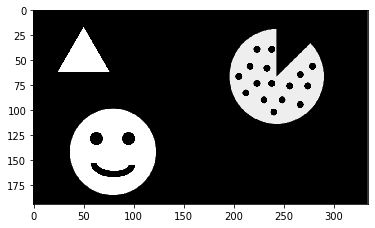

In [196]:
img = cv2.imread('pic.png',0)
plt.imshow(img,cmap="gray")

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [221]:
contours, hierarchy= cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [222]:
type(contours)

tuple

In [223]:
type(hierarchy) , hierarchy.shape

(numpy.ndarray, (1, 23, 4))

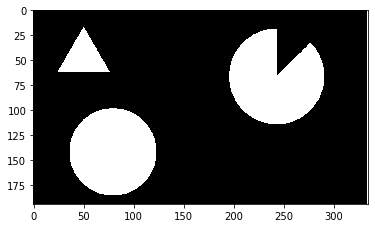

In [224]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

plt.imshow(external_contours,cmap="gray")

In [225]:
len(contours)

23

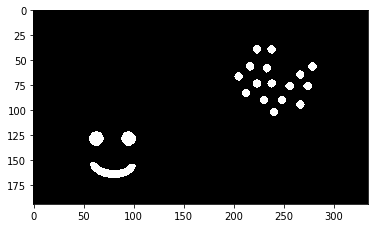

In [227]:
# Create empty array to hold internal contours
internal_contours = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(internal_contours, contours, i, 255, -1)
plt.imshow(internal_contours,cmap="gray")
